
# Exploratory Data Analysis with Pandas and Seaborn Using Black Friday Data Hack Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Data Acquisition">Data Acquisition</a></li>
<li><a href="#Data Wrangling">Data Wrangling</a></li>
<li><a href="#Exploratory Data Analysis">Exploratory Data Analysis</a></li>
<li><a href="#Modeling">Modeling</a></li>
</ul>

<a id='intro'></a>
## Introduction
This dataset is provided by AnalyticsVidhya for "Black Friday Data Hack" challenge to understand the customer purchase behaviour against various products and categories and prodict the purchase amount for creating personalized offers. Based on the different customer demographics and total purchase amount provided, we analyzed which factor are associated with the purchase to predict the purchase amount, including: Age, Gender, Marital status, Occupation, City_Category, Stay_In_Current_City_Years and Product_Category.


<a id='Data Acquisition'></a>
## Data Acquisition

The following Python code loads in the csv data and displays the structure of the data:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


<a id='Data Wrangling'></a>
## Data Wrangling

To identify anomalies, we can quickly compute summary statistics.

In [2]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


First, we need to understand the data structure. Using the info() command we can confirm the train dataset is structed with over 550k entries with 12 features in mixed data types without any duplicated data. There are 17,3638 and 38,3247 missing data in Product_Category_2 and Product_Category_3 columns.

There are 55,0068 and 23,3599 User_ID and Product_ID, of which 5,891 and 3,631 are unique numbers, indicating high percentage of frequency buyers. However, since "User_ID" and "Product_ID" variables don't provide useful information, we will exlude them from the model.



In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [4]:
#find out the numbers of row and column
print("TRAIN DataSet")
print("Rows:", train.shape[0])
print("Columns:", train.shape[1])

print("TEST DataSet")
print("Rows:", test.shape[0])
print("Columns:", test.shape[1])

TRAIN DataSet
Rows: 550068
Columns: 12
TEST DataSet
Rows: 233599
Columns: 11


In [5]:
#check for null values
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

### Handle Missing Data with 0 Value


In [6]:
#fill na with 0
train.fillna(0,inplace = True)
test.fillna(0,inplace = True)

In [7]:
#confirm there are no misising data in the dataset
train.isnull().sum(), test.isnull().sum()

(User_ID                       0
 Product_ID                    0
 Gender                        0
 Age                           0
 Occupation                    0
 City_Category                 0
 Stay_In_Current_City_Years    0
 Marital_Status                0
 Product_Category_1            0
 Product_Category_2            0
 Product_Category_3            0
 Purchase                      0
 dtype: int64, User_ID                       0
 Product_ID                    0
 Gender                        0
 Age                           0
 Occupation                    0
 City_Category                 0
 Stay_In_Current_City_Years    0
 Marital_Status                0
 Product_Category_1            0
 Product_Category_2            0
 Product_Category_3            0
 dtype: int64)

### Remove duplicated value

In [8]:
#check duplicated value
train.duplicated().value_counts()

False    550068
dtype: int64

In [9]:
#Get number of total user id and product id
len(train.User_ID), len(test.Product_ID)

(550068, 233599)

In [10]:
 # get number of unique user_id and product id
len(set(train.User_ID)), len(set(train.Product_ID))

(5891, 3631)

### Detecting Outliers
The boxplot of Occupaton indicates number 20 is a outlier, we use IQR Score to detect and remove outliers from all columns. There are 54,3238 entries in the train dataset after removing outliers.

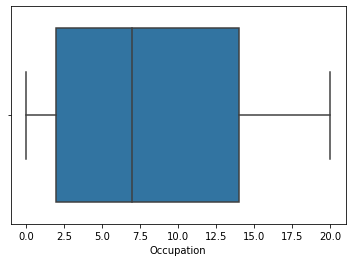

In [11]:
#Detecting Outliers
sns.boxplot(train.Occupation)

In [12]:
#Use IQR Score to detect outliers
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3-Q1
IQR

User_ID               2962.0
Occupation              12.0
Marital_Status           1.0
Product_Category_1       7.0
Product_Category_2      14.0
Product_Category_3       8.0
Purchase              6231.0
dtype: float64

In [13]:
train = train[~((train < (Q1-1.5*IQR))|(train >(Q3+1.5*IQR))).any(axis = 1)]
train.shape

(543238, 12)

<a id='Exploratory Data Analysis'></a>
### Exploratory Data Analysis (EDA)
This section is to explore the purchase distribution with different variables, and the relationship between different variables.

First of all, let's see how the target variable distributed.

### Distribution of the Target Variable

Text(0.5, 1.0, 'Purchase amount Distribution')

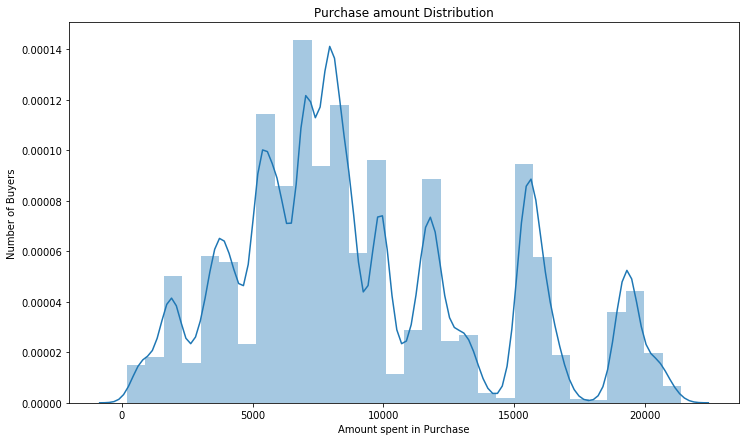

In [14]:
# Distribution of the target variable
plt.figure(figsize=(12,7))
sns.distplot(train.Purchase, bins = 30)
plt.xlabel("Amount spent in Purchase")
plt.ylabel("Number of Buyers")
plt.title("Purchase amount Distribution")

The function skewtest return a value of 0.58, which means that there is more weight in the left tail of the distribution.

In [15]:
print ("Skew is:", train.Purchase.skew())
print("Kurtosis: %f" % train.Purchase.kurt())

Skew is: 0.5890182202556025
Kurtosis: -0.432178


### Relations Between Different Variables
Before exploring the relationship between different variables, we will joint the data set and remove the unrelevant information.

In [16]:
#joining data set
train["source"]= "train"
test["source"]="test"
data = pd.concat([train,test], ignore_index = True, sort = False)
data.shape

(776837, 13)

In [17]:
#Removing unrelevant columns
data.drop(['User_ID','Product_ID'],axis = 1,inplace = True)

In [18]:
data.fillna(0,inplace = True)

The heatmap shows the relationship between different variables are not significant.

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Occupation,1.000000,0.023455,-0.009595,0.007460,0.012734,0.011615
Marital_Status,0.023455,1.000000,0.019901,0.003240,-0.005349,-0.001177
Product_Category_1,-0.009595,0.019901,1.000000,-0.042964,-0.391103,-0.198848
Product_Category_2,0.007460,0.003240,-0.042964,1.000000,0.089298,0.013200
Product_Category_3,0.012734,-0.005349,-0.391103,0.089298,1.000000,0.169551
Purchase,0.011615,-0.001177,-0.198848,0.013200,0.169551,1.000000


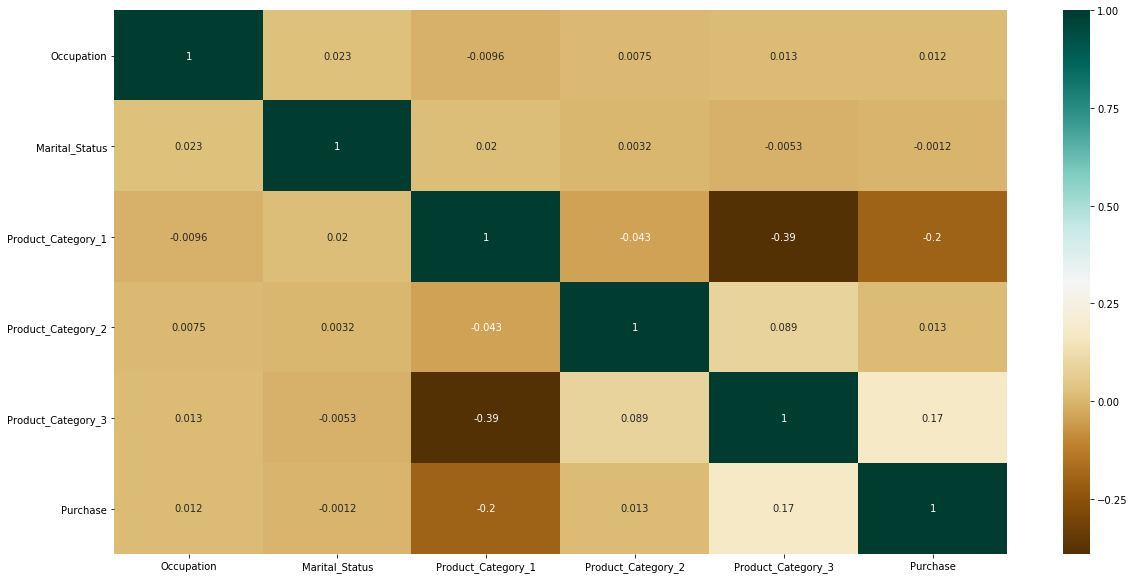

In [19]:
#plot different features against one another with heatmap function

plt.figure(figsize = (20,10))
c=data.corr()
sns.heatmap(c,cmap ="BrBG", annot = True)
c

### Relationship Between Target and Variables

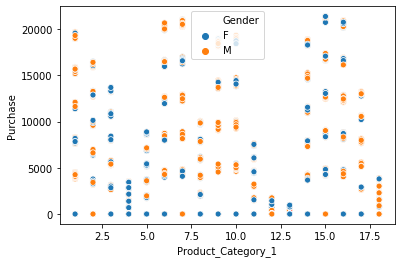

In [20]:
#Scatter Plot to show relations against features
train_product = sns.scatterplot(x="Product_Category_1", y="Purchase", hue="Gender",data=data)
train_product

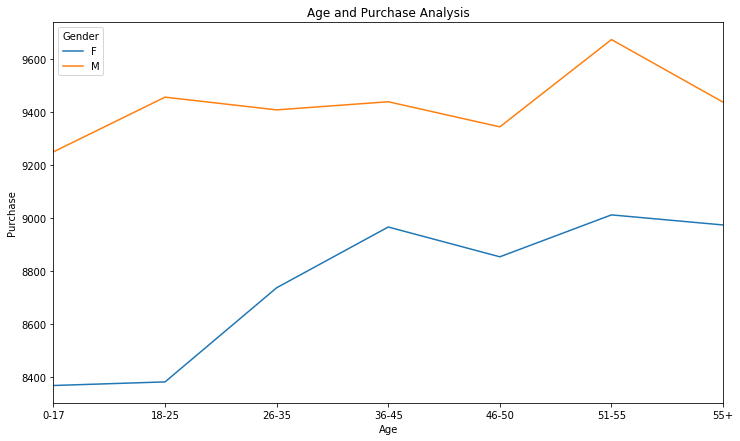

In [21]:
# Avg. Purchase against variables
#Age
Age_pivot = \
train.pivot_table(index='Age', values="Purchase",columns = "Gender", aggfunc=np.mean)
Age_pivot.plot(kind='line',figsize=(12,7))
plt.xlabel("Age")
plt.ylabel("Purchase")
plt.title("Age and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

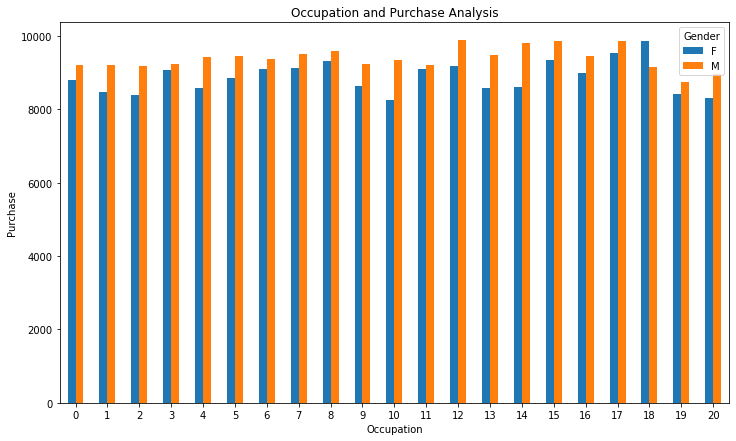

In [22]:
# Avg. Purchase against variables
# Occupation
Occupation_pivot = \
train.pivot_table(index='Occupation', values="Purchase", columns = "Gender", aggfunc=np.mean)
Occupation_pivot.plot(kind='bar',figsize=(12,7))
plt.xlabel("Occupation")
plt.ylabel("Purchase")
plt.title("Occupation and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

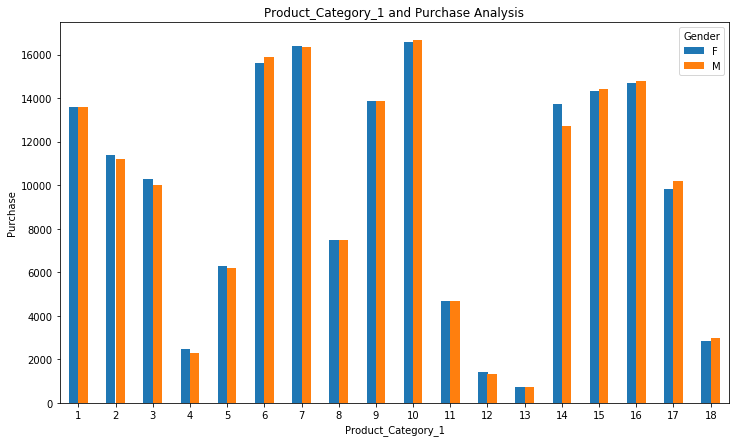

In [23]:
# Avg. Purchase against variables
# Product_Category_1
Product_Category_1_pivot = \
train.pivot_table(index='Product_Category_1', values="Purchase", columns = "Gender", aggfunc=np.mean)
Product_Category_1_pivot.plot(kind='bar',figsize=(12,7))
plt.xlabel("Product_Category_1")
plt.ylabel("Purchase")
plt.title("Product_Category_1 and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

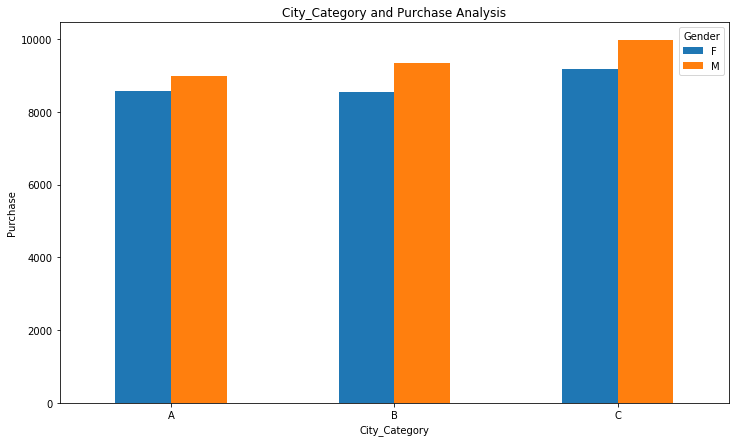

In [24]:

# Avg. Purchase against variables
# City_Category
City_Category_pivot = \
train.pivot_table(index='City_Category', values="Purchase", columns = "Gender", aggfunc=np.mean)
City_Category_pivot.plot(kind='bar',figsize=(12,7))
plt.xlabel("City_Category")
plt.ylabel("Purchase")
plt.title("City_Category and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

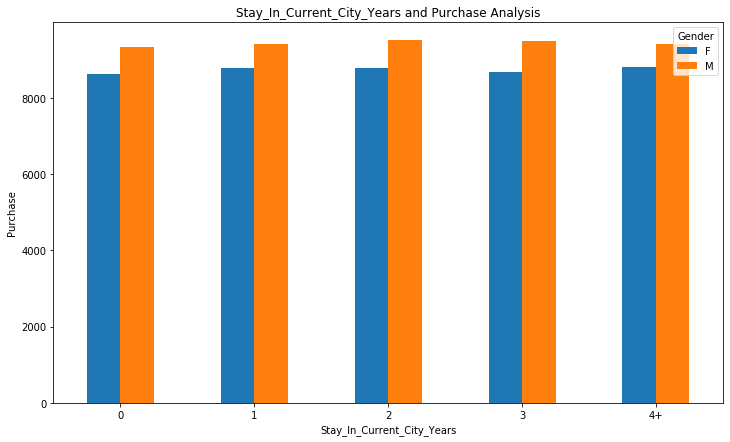

In [25]:
# Avg. Purchase against variables
#Stay_In_Current_City_Years
Stay_In_Current_City_Years_pivot = \
train.pivot_table(index='Stay_In_Current_City_Years', values="Purchase", columns = "Gender", aggfunc=np.mean)
Stay_In_Current_City_Years_pivot.plot(kind='bar',figsize=(12,7))
plt.xlabel("Stay_In_Current_City_Years")
plt.ylabel("Purchase")
plt.title("Stay_In_Current_City_Years and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

# Distribution of Different Features

We use apply function to count each variable value and visulize them using seaborn countplot function and display the gender with different colours.

* Age: Majority of the buyers are between 26-35 years old, followed by aged 36-45. There are more Male buyer than Female buyers across all age groups.

* Occupation: "0", "4" and "7" are the most popular occupation.

* City: There are more buyers from City "B" while City "A" has the least. Majority of the buyers stayed in the city for 1 years, 



In [26]:
#Use apply function to count each variable value
data.apply(lambda x: len(x.unique()))

Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               18
Product_Category_2               18
Product_Category_3               16
Purchase                      16969
source                            2
dtype: int64

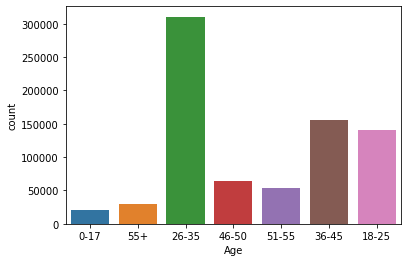

In [27]:
sns.countplot(x="Age", data=data)

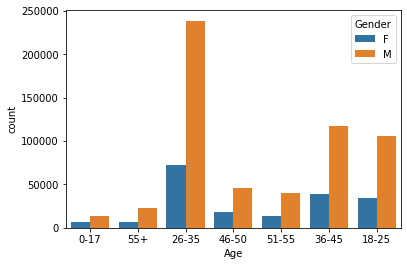

In [28]:
#Distrition of Age variable
sns.countplot(x="Age", data=data, hue="Gender")


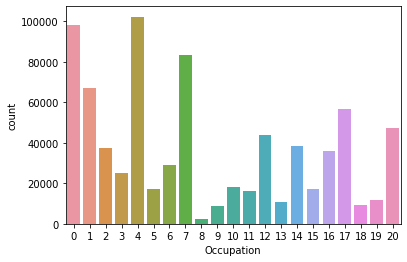

In [29]:
# Distribution of Occupation variables
sns.countplot(x="Occupation", data=data)

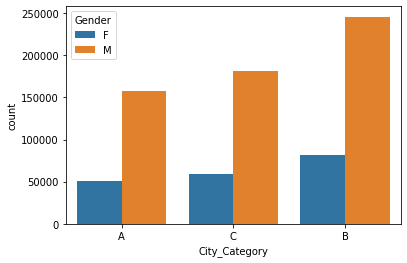

In [30]:
# Distribution of City Category variables
sns.countplot(x="City_Category", data=data, hue="Gender")

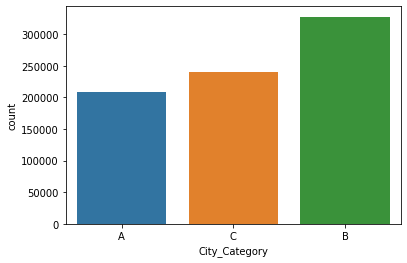

In [31]:
sns.countplot(x="City_Category", data=data)

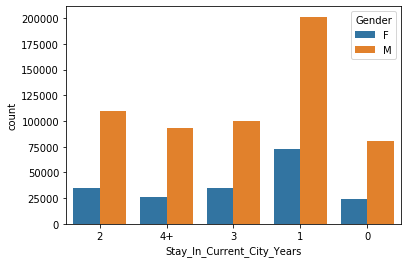

In [32]:
#Distribution of Stay_In_Current_City_Years variables
sns.countplot(x="Stay_In_Current_City_Years", data=data, hue="Gender")

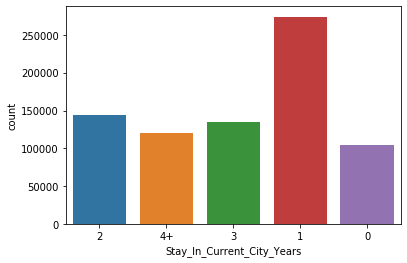

In [33]:
#Distribution of Stay_In_Current_City_Years variables
sns.countplot(x="Stay_In_Current_City_Years", data=data)

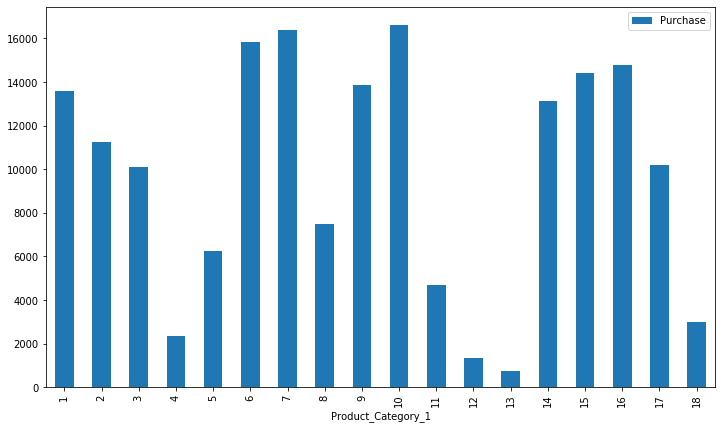

In [34]:
Product_category_1_pivot = \
train.pivot_table(index='Product_Category_1', values="Purchase", aggfunc=np.mean)

Product_category_1_pivot.plot(kind='bar',figsize=(12,7))

## Encoding Categorical Data

In [35]:
#Converting Gender to binary
gender_dict = {"F":0, "M":1}
data.Gender = data.Gender.apply(lambda line: gender_dict[line])
data.Gender.value_counts()

1    584964
0    191873
Name: Gender, dtype: int64

In [36]:
# Giving Age Numerical values
age_dict = {"0-17":0, "18-25":1, "26-35":2, "36-45":3, "46-50":4, "51-55":5, "55+":6}
data.Age = data.Age.apply(lambda line: age_dict[line])
data.Age.value_counts()



2    310628
3    155294
1    140883
4     64643
5     54140
6     30134
0     21115
Name: Age, dtype: int64

In [37]:
#Converting City_Category to binary
city_dict = {"A":0, "B":1, "C":2}
data.City_Category = data.City_Category.apply(lambda line: city_dict[line])
data.City_Category.value_counts()

1    327465
2    240553
0    208819
Name: City_Category, dtype: int64

In [38]:
# Stay_In_Current_City_Years value formatting
data.Stay_In_Current_City_Years.replace("4+", 4,inplace = True)
data.Stay_In_Current_City_Years.value_counts()
data.Stay_In_Current_City_Years = data.Stay_In_Current_City_Years.astype("int64",inplace = True)
data.Stay_In_Current_City_Years.value_counts()

1    273961
2    144145
3    134269
4    119650
0    104812
Name: Stay_In_Current_City_Years, dtype: int64

In [39]:
data.Product_Category_2 = data.Product_Category_2.astype("int64",inplace = True)
data.Product_Category_3 = data.Product_Category_3.astype("int64",inplace = True)


In [40]:
data.dtypes

Gender                          int64
Age                             int64
Occupation                      int64
City_Category                   int64
Stay_In_Current_City_Years      int64
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2              int64
Product_Category_3              int64
Purchase                      float64
source                         object
dtype: object

<a id='Modeling'></a>
# Modeling

### Features and Labels and Convert Data to Arrays

We separate the data into the features and targets. The target, also known as the label, is the value we want to predict

In [41]:
# Labels are the values we want to predict
labels = np.array(data['Purchase'])

# Remove the labels
# axis 1 refers to the columns
data_feature= data.drop('Purchase', axis = 1)

# Saving feature names for later use
data_list = list(data_feature.columns)

# Convert to numpy array
data_feature = np.array(data_feature)

### Train and Test Set

In [42]:
train_data = data.loc[data['source']=="train"]
test_data = data.loc[data['source']=="test"]

In [43]:
train_labels = train_data.Purchase
test_labels = test_data.Purchase

In [44]:

train_features = train_data.drop(['Purchase','source'],axis = 1)

test_features = test_data.drop(['Purchase','source'],axis = 1)


In [45]:
# Saving feature names for later use
features_list = list(train_features.columns)
# Convert to numpy array
train_features = np.array(train_features)
test_features = np.array(test_features)
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

### Train Models

In [46]:
# # Import the model we are using
 from sklearn.ensemble import RandomForestRegressor

# # Instantiate model 
 rf = RandomForestRegressor(n_estimators= 100, random_state=42)
    
##Fit the algorithm on the data

 rf.fit(train_features, train_labels);

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [47]:
#Predict training set:
train_predictions = rf.predict(train_features)
test_predictions = rf.predict(test_features)

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Text(0.5, 1.0, 'Purchase amount Distribution')

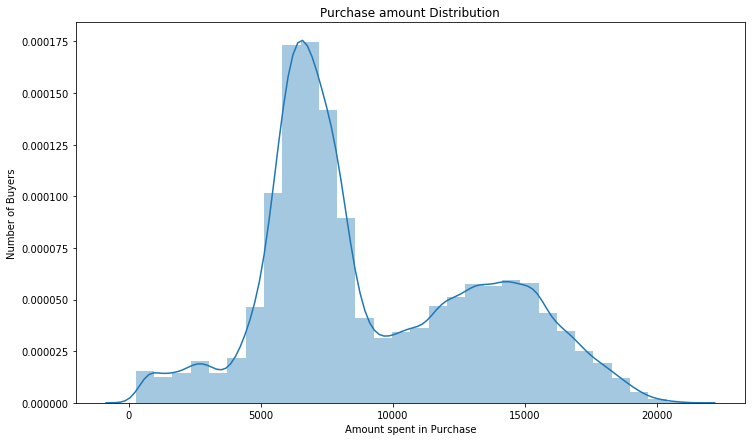

In [48]:
test_data.loc[:,"Purchase"] = test_predictions

#Test Predition Distrubtion
plt.figure(figsize=(12,7))
sns.distplot(test_data.Purchase, bins = 30)
plt.xlabel("Amount spent in Purchase")
plt.ylabel("Number of Buyers")
plt.title("Purchase amount Distribution")